In [19]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [20]:
file = Path('crypto_data.csv')

In [21]:
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [22]:
# List all algorithms in use
algorithms = set(df.Algorithm.values)
print(algorithms)

{'DPoS', 'vDPOS', 'Lyra2Z', 'CryptoNight-V7', 'Ouroboros', 'POS 3.0', 'Momentum', 'PHI2', 'X11', 'SHA-512', 'IMesh', 'Groestl', 'Cloverhash', 'NIST5', 'X13', 'X16S', 'Blake', 'SkunkHash v2 Raptor', 'Slatechain', '1GB AES Pattern Search', 'Counterparty', 'HybridScryptHash256', 'SHA-256', 'SkunkHash', 'Progressive-n', 'M7 POW', 'NeoScrypt', 'Dagger', 'Quark', 'TRC10', 'M00N', 'QuBit', 'Keccak', 'Avesta hash', 'BLAKE256', 'Curve25519', 'PoS', 'Argon2', 'Lyra2RE', 'Blake2b', 'Shabal256', 'X16R', 'SHA3', 'C11', 'Exosis', 'Argon2d', 'CryptoNight Heavy X', 'Proof-of-Authority', 'POS 2.0', 'YescryptR16', 'Multiple', 'QUAIT', 'CryptoNight Heavy', 'Lyra2REv2', 'XEVAN', 'Semux BFT consensus', 'X14', 'Proof-of-BibleHash', 'Ethash', 'ECC 256K1', 'T-Inside', 'Scrypt', 'QuarkTX', 'XG Hash', 'HMQ1725', 'CryptoNight', '536', 'Rainforest', 'Dagger-Hashimoto', 'Zhash', 'Stanford Folding', 'CryptoNight-lite', 'SHA3-256', 'ScryptOG', 'Wild Keccak', 'X15', 'X11GOST', 'SHA-256 + Hive', 'Scrypt-n', 'Leased PO

In [23]:
# print the counts of stocks being currently traded vs. not being currently traded 
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [24]:
# Select only cryptocurrencies that are being traded
df = df.loc[df['IsTrading']==True]
df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [25]:
# Delete the IsTrading column; it is no longer necessary
df = df.drop(columns = 'IsTrading')
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [26]:
# Delete all rows with null values
df = df.dropna(axis=0, how='any')
df.shape

(685, 5)

In [27]:
# Sort values in TotalCoinsMined to identify negative or zero values
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [28]:
# Select only rows with positive TotalCoinsMined values
df = df[df['TotalCoinsMined'] > 0]
len(df)

532

In [29]:
# Delete the CoinName column from the original dataframe
df = df.drop(columns = 'CoinName' )
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [30]:
# Create dummy variables for columns with string values
x = pd.get_dummies(data=df, columns = ['Algorithm', 'ProofType'])
print(x.shape)
x.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
# print the scaled data
x_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [33]:
# Identify the numbers of rows and columns in the scaled data
x_scaled.shape

(532, 98)

### Reduce dataset dimensions with PCA

In [34]:
# Reduce dimensions with PCA
pca = PCA(n_components = 0.99)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(532, 86)

In [36]:
pca.explained_variance_.sum()

88.47283457566151

In [35]:
# Reduce dimensions with PCA 90% of data
pca = PCA(n_components = 0.90)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(532, 74)

In [37]:
# The sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.47283457566151

In [38]:
# Reduce dimensions with t-SNE
tsne1=TSNE(perplexity = 50)
tsne1features = tsne1.fit_transform(prin_components)
tsne1features.shape

(532, 2)

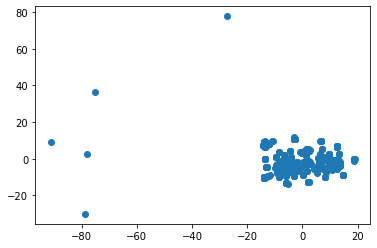

In [39]:
# Plot t-SNE output
x = tsne1features[:,0]
y = tsne1features[:,1]
plt.scatter(x, y)
plt.show()

In [40]:
# Identify clusters with k-means
inertia=[]
k = [1,2,4,5,6,7,8,9,10]
for value in k : 
    kmeans = KMeans(n_clusters = value, random_state = 0)
    kmeans.fit(prin_components)
    inertia.append(kmeans.inertia_)

C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


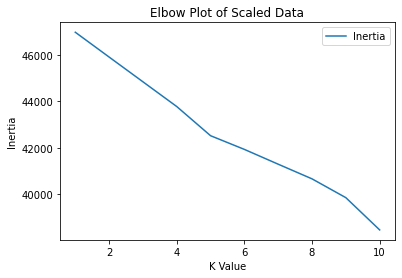

In [41]:
# Create an elbow plot
elbowPlot = pd.DataFrame({'K':k, 'Inertia':inertia})
elbowPlot.plot.line(x = 'K', y = 'Inertia')
plt.ylabel('Inertia')
plt.xlabel('K Value')
plt.title('Elbow Plot of Scaled Data')
plt.show()